# Introdução

O objetivo desse programa é procurar por disciplinas do catálogo da UFABC e identificar disciplinas similares.

Escrito por: Marcelo Bussotti Reyes - CMCC - UFABC
Setembro de 2016

In [1]:
import string
import csv
import numpy as np
import time
import matplotlib.pyplot as plt
from nltk.stem import RSLPStemmer

Primeiramente obtitve o catálogo de disciplinas em formato excel, gentilmente fornecido pela Prof. Paula Tiba e sua equipe da Pró-Reitoria de Graduação. Exportei para formato csv, colocando como delimitador de campo "tab". O nome do arquivo é 

In [2]:
filename = 'catalogo16_17.csv'
colSigla  = 0                     # coluna que contém as siglas das disciplinas
colNome   = 1                     # coluna com o nome das disciplinas
colEmenta = 4                     # coluna com as ementas
colBibliB = 5                     # coluna bibliografia básica
colBibliC = 6                     # coluna bibliografia complementar

stopWords = ['a'   , 'e' , 'é', 'o' , 'as' , 'os' ,'ao','aos',      \
             'da'  , 'de', 'do' , 'das', 'dos',                     \
             'em'  , 'na', 'no' , 'nos', '–',                           \
             'para','com', 'por', 'à'  , 'às' , 'sobre',            \
             'um'   ,'uma',  'como', 'entre', 'que', 'ou',          \
             'seu', 'sua', 'seus', 'suas', '2ª', 'são', 'paulo','rio','janeiro','rj','sp',\
             '¿'    , 'ed', 'and', 'of','press', 'org','et','não',  \
             'b', 'c', 'd','f','g','h','i','j','k','l','m',         \
             'n', 'o', 'p', 'q','r','s','t','u','v','w','x','y','z',\
             '1','2','3','4','5','6','7','8','9','new','york','isbn']

year = 1980
while year < 2017:
    stopWords.append(str(year))
    year = year +1;


ELIM_MOST_FREQ = 500              # além palavras acima, esta opção permite 
                                   # eliminar palavras mais frequentes presentes nas ementas
ELIM_MULT_OCORRENCIAS = bool(1)    # se True - elimina a contagem múltipla de palavras, contanto somente 1 ocorrência

''' Para a identificação das disciplinas, compilamos todas as palavras de cada ementa e 
    colocamos em um dicionário onde a chave é a palavra e o valor é o número de ocorrências 
    da palavra na ementa.''' 

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

# removendo as palavras muito frequentes como artigos e preposições 
# as stopWords foram definidas no início da rotina
def removeStopWords(texto,stopWords):
    for sw in stopWords:                           # Laço para cada stopWord
        # Remove as stopWords uma a uma. Foram incluídos espaços para evitar 
        #remover partes das palavras
        texto = texto.replace(' '+sw+' ',' ')
        #texto = texto.replace(sw+' ',' ')      
    return texto

def limpaTexto(texto,stopWords):
    #transformacao = str.maketrans('', '', string.punctuation) #creates a table for translation for all puntuation
    spcs = len(string.punctuation)*' '                         # creates a string with same length of punctuation
    transformacao = str.maketrans(string.punctuation,spcs)     # creates a map from punctuation to white spaces
    texto = texto.translate(transformacao)                     # removes all the punctuation
    texto = texto.lower()                                      # makes all words in lower case
    texto = removeStopWords(texto,stopWords)                   # removes stop words defined at the beginning
    texto = texto.replace('\n',' ')                            # removes the newline marks
    return texto

def criaVetor(texto):
    palavras = texto.split()                              # quebra a string em uma lista de palavras
    contagemPalavras = []                                 # inicia lista de palavras
    for w in palavras:                                    # loop para cada palavra
        contagemPalavras.append(palavras.count(w))        # conta o número de vezes que cada palavra ocorre na lista
                                                          # e acrescenta à lista contagemPalavras
    vetor =  dict(zip(palavras, contagemPalavras))        # Cria dicionário com as palavras e as respectivas contagens
    return vetor

catalogo = list(csv.reader(open(filename, 'r'), delimiter='\t'))
catalogo = catalogo[1:][:]

# Aqui juntamos o texto de todas as ementas e colocamos num único string, para saber todas as palavras usadas
todasEmentas=''

for k in range(len(catalogo)):
        todasEmentas = todasEmentas + ' ' + catalogo[k][colEmenta] + ' ' + catalogo[k][colBibliB]
#todasEmentas = todasEmentas.replace('\n',' ')

# removendo pontuações e stop-words
todasEmentasLimpo = limpaTexto(todasEmentas,stopWords)
#print(todasEmentasLimpo[1:1000])

## Este passo pode ser bastante demorado

Nesse ponto temos uma lista (palavras) e uma lista de quantas vezes cada palavra ocorre (contagemPalavras). Vamos agora criar um dicionário com esses pares, e ordená-lo da mais frequente para a menos frequente. 

!!!Bastante demorado!!!! 
pode levar até 5 minutos para rodar.

In [3]:
allPairs  = criaVetor(todasEmentasLimpo)
sortPairs = sortFreqDict(allPairs)                    # usa a função definida no início para ordenar em ordem decrescente

In [4]:
emptyPairs = {}                                       # inicia variável
for aux in allPairs.keys():                          # loop para todas as palavras
    emptyPairs[aux] = 0                              # cria um dicionário com todas as palavras, mas com contagem zero

Por curiosidade, vamos visualizar as palavras mais frequentes

In [5]:
for k in range(ELIM_MOST_FREQ+1):
    # just for visualization, let's see the mostr frequent words...
    print(str(k+1) + ": " + str(sortPairs[k][1]) + ' ==> '+ str(sortPairs[k][0]) + ' vezes')
    

1: sistemas ==> 543 vezes
2: editora ==> 429 vezes
3: introdução ==> 372 vezes
4: análise ==> 358 vezes
5: desenvolvimento ==> 294 vezes
6: edição ==> 293 vezes
7: teoria ==> 282 vezes
8: brasil ==> 282 vezes
9: aplicações ==> 255 vezes
10: fundamentos ==> 234 vezes
11: the ==> 225 vezes
12: energia ==> 221 vezes
13: conceitos ==> 220 vezes
14: engenharia ==> 218 vezes
15: filosofia ==> 209 vezes
16: ensino ==> 204 vezes
17: políticas ==> 201 vezes
18: to ==> 194 vezes
19: projeto ==> 194 vezes
20: trabalho ==> 193 vezes
21: métodos ==> 191 vezes
22: política ==> 188 vezes
23: wiley ==> 186 vezes
24: modelos ==> 185 vezes
25: hall ==> 184 vezes
26: princípios ==> 183 vezes
27: técnicas ==> 182 vezes
28: in ==> 182 vezes
29: processos ==> 179 vezes
30: porto ==> 174 vezes
31: introduction ==> 172 vezes
32: educação ==> 171 vezes
33: curso ==> 171 vezes
34: planejamento ==> 168 vezes
35: ciência ==> 168 vezes
36: economia ==> 165 vezes
37: sistema ==> 160 vezes
38: prentice ==> 160 vezes

In [6]:
for k in range(ELIM_MOST_FREQ):               # loop for the number of words to be eliminated
    sortPairs.remove(sortPairs[0])            # elimina primeiro da lista e retorna o vetor "truncado"

In [7]:
for k in range(20):
    # just for visualization, let's see the mostr frequent words...
    print(str(k) + ": " + str(sortPairs[k][1]) + ' ==> '+ str(sortPairs[k][0]) + ' vezes')

0: regulação ==> 30 vezes
1: programming ==> 30 vezes
2: primeira ==> 30 vezes
3: metodologias ==> 30 vezes
4: memória ==> 30 vezes
5: matriz ==> 30 vezes
6: legislação ==> 30 vezes
7: identidade ==> 30 vezes
8: histórica ==> 30 vezes
9: governo ==> 30 vezes
10: ferramentas ==> 30 vezes
11: específico ==> 30 vezes
12: escola ==> 30 vezes
13: ensaios ==> 30 vezes
14: edu ==> 30 vezes
15: decisão ==> 30 vezes
16: cortez ==> 30 vezes
17: computação ==> 30 vezes
18: companhia ==> 30 vezes
19: combustão ==> 30 vezes


Gerando vetores para palavras frequentes. Aqui, me refiro a vetores, porque são espécies de histogramas indexados pela própria palavra. Python permite esse tipo de estrutura através do tipo "dicionário", ou dict. Assim, é criado um dicionário que contém cada palavra da ementa como chave e o número de ocorrências como entrada. Ex. se a palavra civilização occorre 3 vezes, teremos uma linha do dicionário que será V['civilização']=3, ou {'civilização':3}. As duas maneiras são idênticas para o Python.

Uma vez criado o vetor de todas as palavras, de todas as ementas, criamos um vetor para cada disciplina, usando como base o vetor geral, de forma que o dicionário de todas as ementas são iguais no número de entradas e nas chaves, somente diferindo no número de ocorrência de cada palavra. 

Fazendo os vetores idênticos, podemos criar uma matriz "empilhando" os vetores somente do número de entradas. Com isso, criamos uma matriz onde cada linha é o vetor de cada ementa do catálogo. As entradas da matriz V[i,j] são o número de occorrências de palavra[j] na ementa[i], para j indo da primeira à última palavra de todo o catálogo e i indo de 1 até o número de disciplinas.

In [8]:
V = np.zeros((len(catalogo), len(emptyPairs)),dtype=int)    # inicia o vetor com o tamanho adequado (número de ementas)
l = len(emptyPairs)                                         # guarda o valor do número de palavras total do catálogo
palavras = list()
palavras.append('none')
for k in range(len(catalogo)):                           # loop para cada disciplina do catálogo
    estaSigla  = catalogo[k][colSigla ]                     # guarda a sigla da disciplina como uma string
    estaEmenta = catalogo[k][colEmenta] + ' ' + catalogo[k][colBibliB]   
    estaEmentaLimpa = limpaTexto(estaEmenta,stopWords)      # remove as palavras muito frequêntes como preposições, etc    
    palavras.append(estaEmentaLimpa.split())                # cria lista com as palavras menos frequentes de cada ementa
    esteVetor = criaVetor(estaEmentaLimpa)                  # cria o vetor com a contagem das palavras para essa disc.
    if ELIM_MULT_OCORRENCIAS:
        for p in esteVetor.keys():                          # elimina múltiplas contagens de uma mesma palavra
            if esteVetor[p]>0:                              # deixando o vetor somente com entradas 0 ou 1
                esteVetor[p]=1
    vetorCompleto = emptyPairs.copy()                       # cria uma cópia do histograma de todo o catálogo
    vetorCompleto.update(esteVetor)                         # joga as contagens das palavras dessa disciplina no 
                                                            # dicionário geral. Esse passo é necessário para deixar todos
                                                            # os dicionários das disciplinas com o mesmo tamamho e na
                                                            # ordem.
    if len(vetorCompleto) != l:                             # Aqui é um pequeno bug. Quando uma ementa começa com uma
                                                            # palavra frequente, o algoritmo náo consegue remover
                                                            # então preciso fazer essa checagem para uniformizar os vetores
        s1 = set(vetorCompleto.keys())                      # joga todas as palavras dessa disciplina em um conjunto (set)
        s2 = set(allPairs.keys())                           # joga todas as palavras de todas as disciplinas em um set
        s1.difference_update(s2)                            # identifica qual é a palavra diferente guarda em s1
        for aux in s1:                                     # for para todas essas palavras
            del vetorCompleto[aux]                          # apaga as entradas do dicionário dessa disciplina 

    type(vetorCompleto)
    
    V[k][:] = np.fromiter(iter(vetorCompleto.values()),dtype=int) # finalmente cria o vetor para essa disciplina e guarda em uma
                                                                  # linha da matriz
M = np.inner(V,V)       # multiplica a matriz V pela transposta (V'), de forma a obter
                        # um produto escalar dos histogramas, que dão uma medida da 
                        # da sobreposição entre eles.

In [92]:
#aux2 = np.zeros(M.shape[0])
#for aux in range(M.shape[0]):
#    aux2[aux] = np.sum(M[:,aux])
#print(aux2)

#condition = M>=0.8

#nonzero(M>0.8)
#import scipy.io as sio
#sio.savemat('V.mat', {'vect':V})


M2 = np.copy(M).astype(float)
for i in range((M.shape[0])):
    for j in range(i,(M.shape[1])):
        #print(i,j,M[i,j],M[j,i],M[i,i],M[j,j])
        M2[i,j] = float(M[i,j])/float(min(M[i,i],M[j,j]))
        M2[j,i] = M2[i,j]

#np.set_printoptions(precision=2,suppress=True)    
#print(M2[:10,:10])
        

In [116]:
thres = 0.75
k=1;
j=0;
a = ['trabalho', 'graduação', 'estágio', 'seminários', 'temas', 'tópicos', 'projeto de graduação']

pairs = []; #np.array([0,0])
for j in range(M2.shape[1]):
    #print(j)
    ind = np.array(np.where(M2[:,j] >= thres))
    ind = ind[np.where(ind>j)]
    if len(ind) > 0:
        for l in range(len(ind)):
            strng = catalogo[ind[l]][1]
            #print(catalogo[ind[l]][1])
            if   not any(y in strng.lower() for y in a):
                pairs.append([ind[l],j])
           
pairs = np.array(pairs)            
pairs = pairs[1:,:]
print(type(ind))
print(ind)
print(pairs)
print(len(pairs))

<class 'numpy.ndarray'>
[]
[[  70   69]
 [ 328   86]
 [ 415   86]
 [  90   89]
 [1146   98]
 [1154   98]
 [ 109  108]
 [ 799  140]
 [ 219  208]
 [ 244  243]
 [ 267  266]
 [ 284  283]
 [ 679  285]
 [ 680  285]
 [ 860  307]
 [ 489  409]
 [1161  416]
 [1164  416]
 [ 680  679]
 [ 708  707]
 [ 793  792]
 [ 822  821]
 [ 845  844]
 [ 860  848]
 [ 860  849]
 [ 860  850]
 [ 888  884]
 [ 994  993]
 [1135 1134]
 [1154 1146]
 [1164 1161]]
31


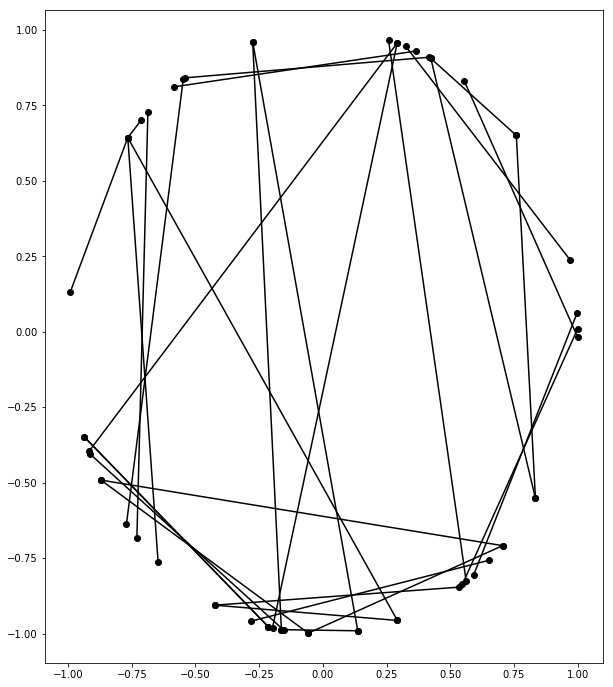

In [124]:
thetaMax = pairs.max() 
i = np.complex(0,1)
for k in np.arange(1,pairs.shape[0]):
        a = pairs[k,0]-thetaMax/2/np.pi; 
        b = pairs[k,1]-thetaMax/2/np.pi;
        x=np.vstack([[np.real(np.exp(i*a)),np.imag(np.exp(i*a))],[np.real(np.exp(i*b)),np.imag(np.exp(i*b))]])
        plt.plot(x[:,0],x[:,1],'ko-');
pylab.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [123]:
for aux in pairs:
    #aux=allPairs[j,:]
    for k in aux:
        print(catalogo[k][1])
        print(catalogo[k][4], '\n')
    print('------------------\n\n')
        #print(catalogo[k][1])

Bases Biológicas para Engenharia II
Sistema digestório: anatomia, fisiologia, fisiopatologia. Técnicas de monitorização, diagnóstico e terapêutica aplicados ao sistema digestório. Sistema reprodutor: fisiopatologia e técnicas de monitorização, diagnóstico e terapêutica aplicados ao sistema reprodutor. Sistema renal: anatomia, fisiologia, fisiopatologia. Técnicas de monitorização, diagnóstico e terapêutica aplicados ao sistema renal. Sistema neuro-muscular: anatomia, fisiologia, fisiopatologia. Técnicas de monitorização, diagnóstico e terapêutica aplicados ao sistema neuro-muscular. Ergonomia; fisiologia do exercício e introdução à biomecânica. 

Bases Biológicas para Engenharia I
Introdução à anatomia e fisiopatologia humana; inflamação e resposta imunológica; introdução às principais técnicas de diagnóstico e terapia. Sistema cardiovascular: anatomia, fisiologia, fisiopatologia. Técnicas de monitorização, diagnóstico e terapêutica aplicados ao sistema cardiovascular. Sistema respirató

Nesse ponto, temos uma matriz simétrica M[i,j] onde cada entrada é o produto escalar entre a disciplina[i] e a displina[j]. Porém o produto escalar pode variar muito com o tamanho das ementas. Assim, uma medida melhor é dividir o produto escalar pela "norma" de cada disciplina comparada, ou seja, criar um coeficiente coef = M[i,j]/(M[i,i]*M[j,j]), de forma que o coef tenha um valor máximo de 1 (100%) quando as ementas forem idênticas, e zero quando não tiverem qualquer palavra em comum.

#Ordenando por sobreposição
Aqui é somente uma preciosidade de ordenar as disciplinas por sobreposição, das mais sobrepostas às menos sobrepostas.

In [109]:
(I,J) = M.nonzero()   # Busca por valores não nulos na matriz M e joga os índices em I e J

#aux = np.array([[I[k],J[k],float(M[I[k],J[k]]*M[I[k],J[k]])/float(M[I[k],I[k]]*M[J[k],J[k]])] for k in range(I.size) ])
# Deixando o código abaixo, caso se queira ordenar pelo coeficiente 2 (coef2)
aux = np.array([[I[k],J[k], float(M[I[k],J[k]])/float(min(M[I[k],I[k]],M[J[k],J[k]])) ] for k in range(I.size) ])

aux = aux[aux[:,2].argsort(),]             # ordena o vetor
aux = aux[::-1,]                           # coloca o vetor em ordem reversa (de maior sobreposição para menor)

I = aux[0:,0].tolist()                     # converte os índices, agora ordenados para uma lista do python
I = [int(i) for i in I]                    # converte a lista para uma lista de inteiros
J = aux[0:,1].tolist()                     # converte os índicer, agora ordenados para uma lista do python
J = [int(j) for j in J]                    # converte a lista para uma lista de inteiros

Nesse ponto temos os índices I e J definem os índices das disciplinas que têm alguma sobreposição. As listas estão organizadas da maior sobre posição para a menor.

# Gerando lista com ementas em ordem de semelhança
* Observação:foram eliminadas as disciplinas que contém as palavras: estágio, trabalho, tcc etc (ver código abaixo). Isso é para eliminar as disciplinas como trabalho de graduação

In [15]:
for k in range(len(I)):                                # loop para cada disciplina

    # --- Calculando o coeficiente de sobreposição ---
    coef = float(M[I[k],J[k]]*M[I[k],J[k]])/float(M[I[k],I[k]]*M[J[k],J[k]])
    minimo = min(M[I[k],I[k]],M[J[k],J[k]]);
    coef2= float(M[I[k],J[k]])/float(minimo)
    nome = catalogo[I[k]][colNome].lower().split()
    
    # --- separando as ementas em listas de palavras para comparação ---
    ementaI = catalogo[I[k]][colEmenta].split()
    ementaJ = catalogo[J[k]][colEmenta].split()
    
    # --- Visualisando as emenstas em ordem decrescente de similaridade ---
    #     Note que usamos I[k]<J[k]-3 para remover as que estão menos de 3 
    #     ementas de "distância" no catálogo, que normalmente são versões
    #     da mesma disciplina '''
    if 0.3 < coef2 and I[k] < J[k] and 'graduação' not in set(nome) and  \
        'estágio' not in set(nome) and    'tcc'    not in set(nome) and  \
        len(set('trabalho de conclusão'.split()) & set(nome))!=3: 
        
        # --- Imprimindo os coeficientes na tela para informação ---
        #print('Sobreposição = ',int(round(coef*100)),'%\t', 'Sobreposição 2 = ', int(round(coef2*100)),'%')
        print('Sobreposição = ', int(round(coef2*100)),'%')
        # --- Encontrando e imprimindo as palavras que estão em ambas as ementas --- 
        print('Palavras em comum:')
        palavrasComuns = set(palavras[I[k]]).intersection(set(palavras[J[k]]))  # encontra intersecção entre ementas
        palavrasComuns = list(palavrasComuns)                                   # transforma em uma lista
        
        for i in range(len(palavrasComuns)):
            print(palavrasComuns[i],end=' ')      # imprime palavras encontradas em ambas as disciplinas, na mesma linha
            
        # --- imprimindo as ementas na tela para comparação ---    
        print('\n')
        print(catalogo[I[k]][0],'-', catalogo[I[k]][1], '  --- número', I[k], ' do catálogo')
        print(catalogo[I[k]][colEmenta])
        print(catalogo[I[k]][colBibliB])
        
        print('\n')
        print(catalogo[J[k]][0],'-', catalogo[J[k]][1], '  --- número', J[k], ' do catálogo')
        print(catalogo[J[k]][colEmenta])
        print(catalogo[J[k]][colBibliB])
        
        print('\n','_________________________________________','\n\n') 

Sobreposição =  100 %
Palavras em comum:


ESZT020-17 - Práticas Especiais do Planejamento Territorial   --- número 797  do catálogo
O curso terá o programa definido em função do andamento das pesquisas, projetos e conteúdos que estão sendo realizados no âmbito do Planejamento Territorial.
Será estabelecida a partir da definição do programa em cada quadrimestre.


ESZT018-17 - Tópicos Especiais em Planejamento Territorial   --- número 1084  do catálogo
O curso terá o programa definido em função do andamento das pesquisas, projetos e conteúdos que estão sendo realizados no âmbito do Planejamento Territorial.
Será estabelecida a partir da definição do programa em cada quadrimestre.

 _________________________________________ 


Sobreposição =  100 %
Palavras em comum:


NHZ1042-15 - Seminários em Biologia I   --- número 937  do catálogo
Tem como objetivo discutir temas atuais e tendências em diversas especialidades da Biologia. Através de seminários discentes, palestras de docentes da un